In [2]:
from pydub import AudioSegment
from pydub.utils import make_chunks
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

In [3]:
# nums = [0, 1, 2, 7, 10]
nums = [0, 1, 7]

# for num in nums:
#     filename = 'speaker{}.wav'.format(num)
#     myaudio = AudioSegment.from_wav(filename)

#     chunk_length_ms = 1000 * 10 # pydub calculates in millisec
#     chunks = make_chunks(myaudio, chunk_length_ms) # Make chunks of 10 sec

#     # Export all of the individual chunks as wav files
#     for i, chunk in enumerate(chunks):
#         chunk_name = "speaker{}_part{}.wav".format(num, i + 1)
#         chunk.export(chunk_name, format="wav")


In [26]:
filename = 'speaker1_part1.wav'
x, sr = librosa.load(filename)
print(x.shape)
print(type(x))
print(x.max(), x.min())

print(sr)
print(type(sr))

(220500,)
<class 'numpy.ndarray'>
0.5468017 -0.56280434
22050
<class 'int'>


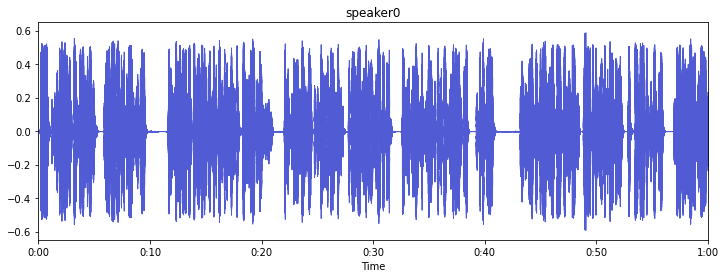

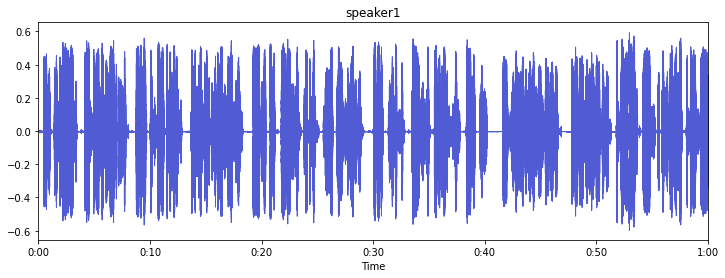

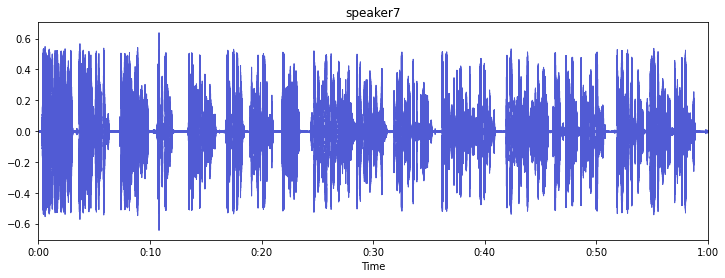

In [5]:
for num in nums:
    filename = 'speaker{}.wav'.format(num)
    x, sr = librosa.load(filename)
    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x, sr=sr, color='#515bd4')
    plt.title(filename[:-4])

    plt.show()

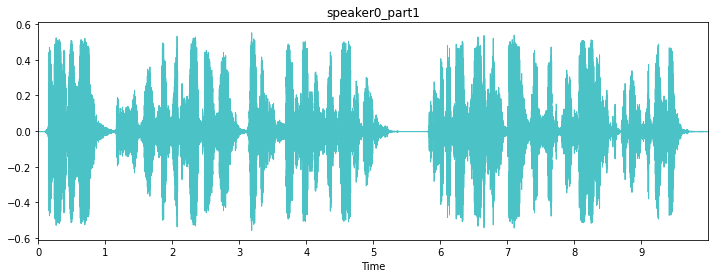

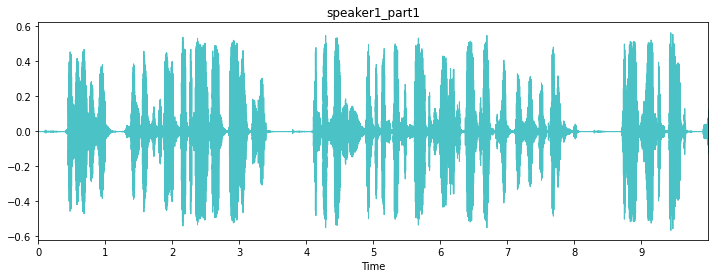

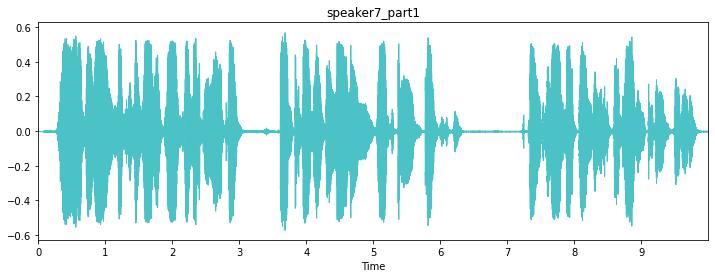

In [6]:
for num in nums:
    filename = 'speaker{}_part1.wav'.format(num)
    x, sr = librosa.load(filename)
    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x, sr=sr, color='#4bc2c5')
    plt.title(filename[:-4])

    plt.show()

Спектрограма – це візуальне зображення спектру частот сигналу в часі.

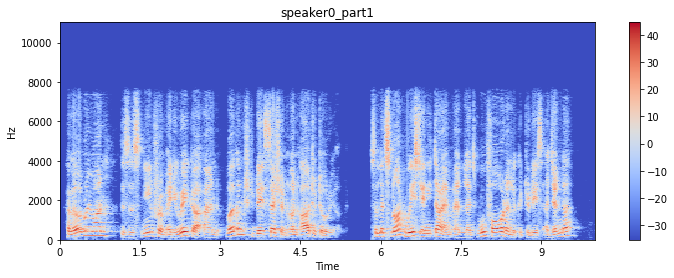

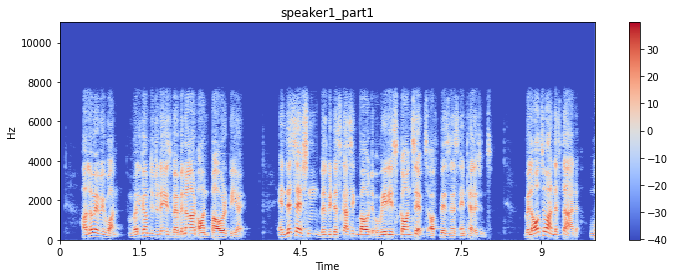

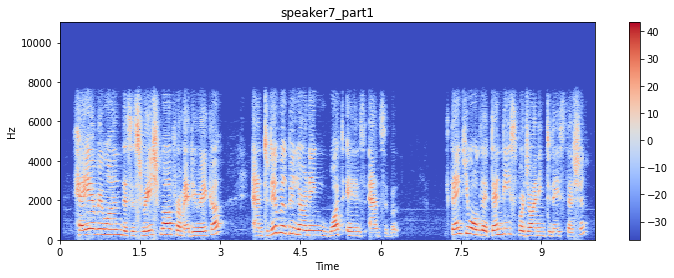

In [7]:
for num in nums:
    filename = 'speaker{}_part1.wav'.format(num)
    x, sr = librosa.load(filename)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title(filename[:-4])
    plt.show()

Перетворення осі частот в логарифмічну 

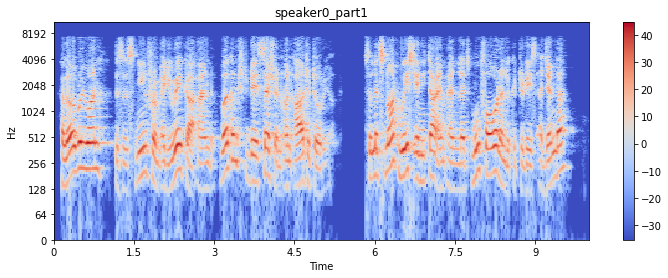

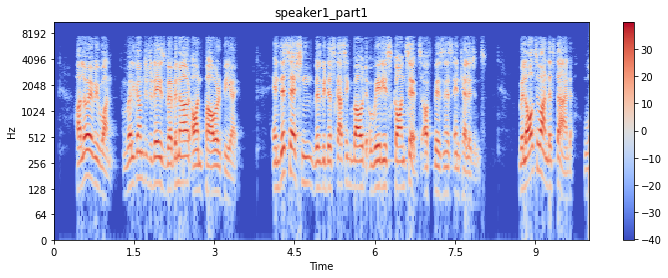

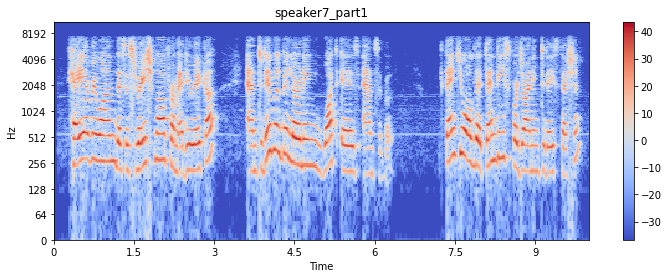

In [8]:
for num in nums:
    filename = 'speaker{}_part1.wav'.format(num)
    x, sr = librosa.load(filename)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.title(filename[:-4])
    plt.show()

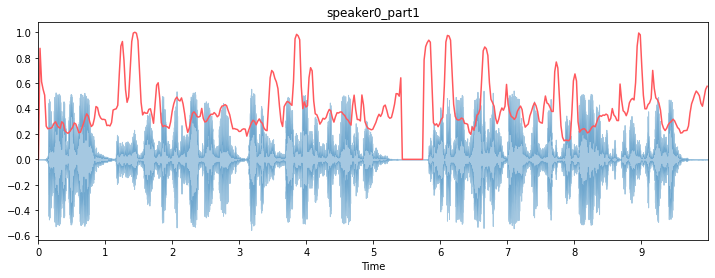

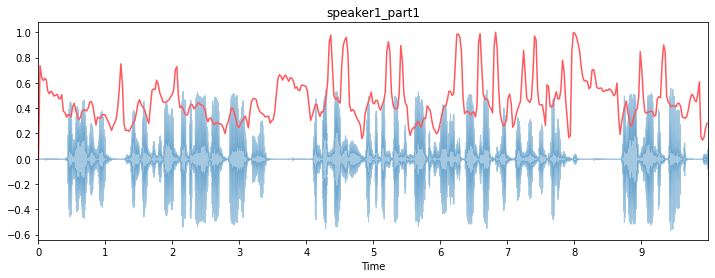

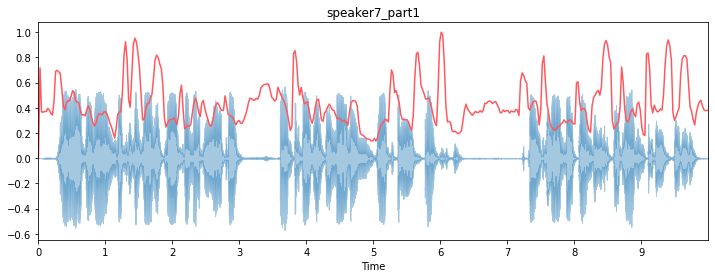

In [9]:
import sklearn

for num in nums:
    filename = 'speaker{}_part1.wav'.format(num)
    x, sr = librosa.load(filename)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
    spectral_centroids.shape
    (775,)
    
    # Вычисление временной переменной для визуализации
    plt.figure(figsize=(12, 4))
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    # Нормализация спектрального центроида для визуализации
    def normalize(x, axis=0):
        return sklearn.preprocessing.minmax_scale(x, axis=axis)
    # Построение спектрального центроида вместе с формой волны
    librosa.display.waveplot(x, sr=sr, alpha=0.4)
    plt.title(filename[:-4])
    plt.plot(t, normalize(spectral_centroids), color='#ff585d')

## MEL-чатотні кепстральні коефіцієнти -
набір признаків що коротко описують загальну форму спектральної кривої. Моделюють характеристики людського голосу

The cepstrum is a representation used in homomorphic signal processing, to convert signals combined by convolution (such as a source and filter) into sums of their cepstra, for linear separation. In particular, the power cepstrum is often used as a feature vector for representing the human voice and musical signals.

! [Cepstrum_signal_analysis.png]

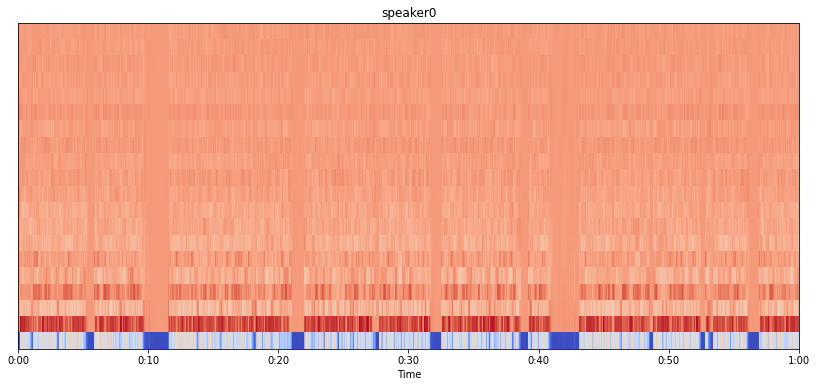

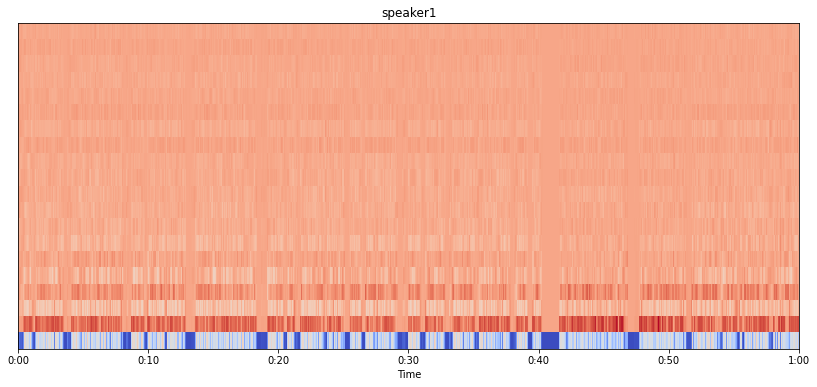

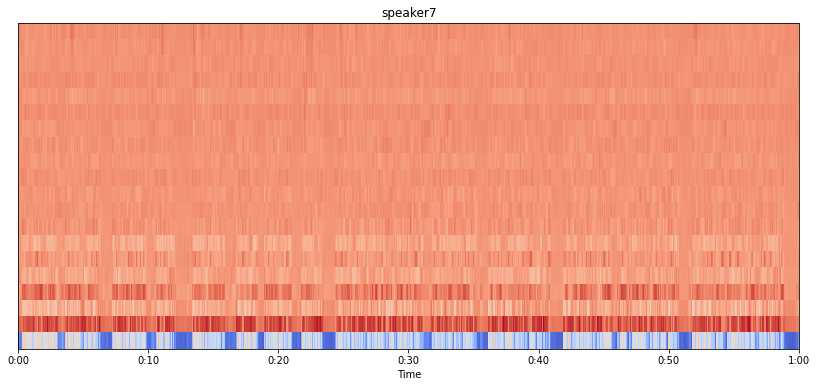

In [10]:
for num in nums:
    filename = 'speaker{}.wav'.format(num)
    x, sr = librosa.load(filename)
    
    mfccs = librosa.feature.mfcc(x, sr=sr)
    plt.figure(figsize=(14, 6))
    plt.title(filename[:-4])
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [11]:
nums = [0, 1, 2, 7, 10]
sums = []

for num in nums:
    each_sums = []
    for part in range(1, 7):
        filename = 'speaker{}_part{}.wav'.format(num, part)
        x, sr = librosa.load(filename)
        mfccs = librosa.feature.mfcc(x, sr=sr)
        each_sums.append(np.median(mfccs))
    sums.append(each_sums)
sums

[[-7.1375756, -5.9932604, -5.9566875, -5.6415033, -3.5527954, -5.978349],
 [-5.982273, -5.4995985, -4.826293, -5.062364, 0.0, -4.653696],
 [-4.2771907, -1.5637393, -5.767085, -2.400034, -4.8029604, -3.8748674],
 [-7.146859, -6.6805215, -7.3739386, -6.507668, -7.207668, -6.562992],
 [-3.4156852, 1.8653071, -2.4114327, -2.7518399, -2.568566, -4.2641125]]

Хромаграма - вектор "кольоровості" з 12 ел-в (зазвичай), в якому вказано к-ть енергії кожного висотного класу {C, C#, D, D#, E, …, B} в сигналі
Використовується для опису міри схожості між музикальними творами і тд

<Figure size 576x216 with 0 Axes>

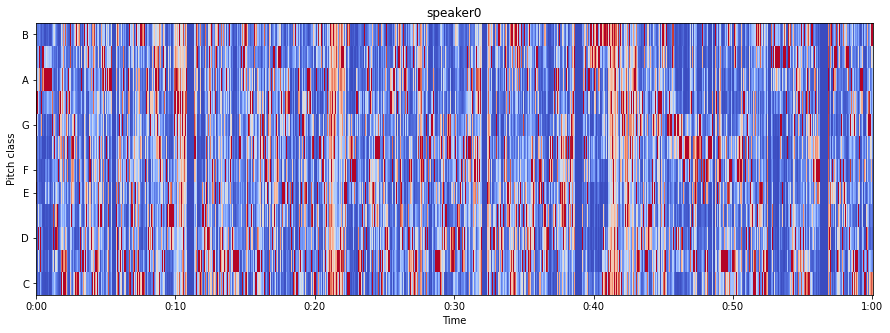

<Figure size 576x216 with 0 Axes>

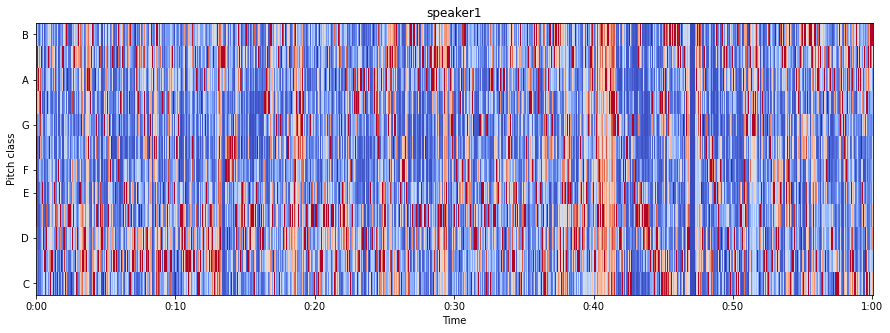

<Figure size 576x216 with 0 Axes>

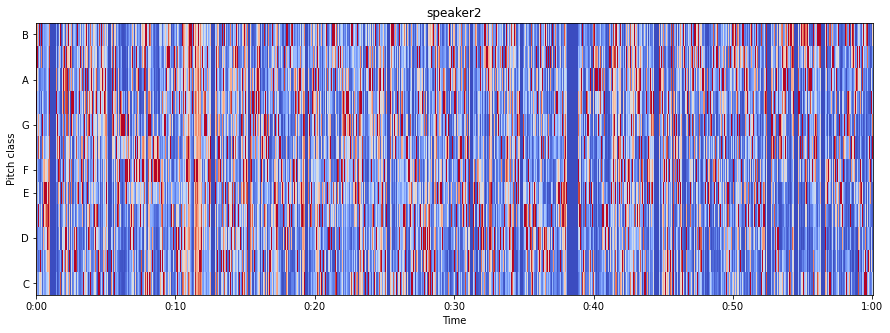

<Figure size 576x216 with 0 Axes>

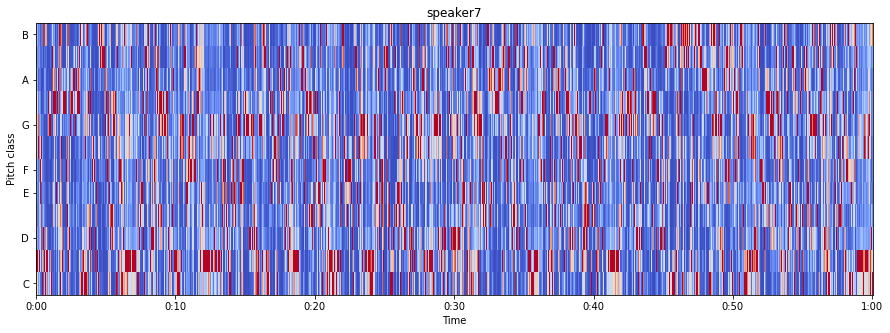

<Figure size 576x216 with 0 Axes>

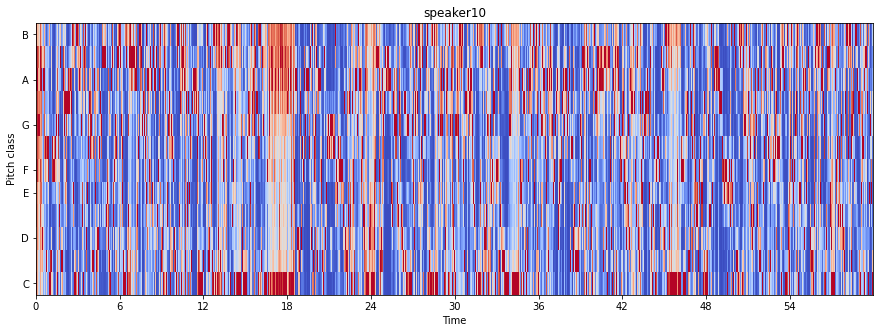

In [12]:

for num in nums:
    filename = 'speaker{}.wav'.format(num)
    x, sr = librosa.load(filename)
    plt.figure(figsize=(8, 3))
    chromagram = librosa.feature.chroma_stft(x, sr=sr)
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.title(filename[:-4])
    plt.show()
    

In [44]:
nums = [0, 1, 2, 7, 10]
means = []

for num in nums:
    each_means = []
    for part in range(1, 7):
        filename = 'speaker{}_part{}.wav'.format(num, part)
        x, sr = librosa.load(filename)
        chromagram = librosa.feature.chroma_stft(x, sr=sr)
        each_means.append(np.mean(chromagram))
    means.append(each_means)
    
means_for_whole = []
medians_for_whole = []

for num in nums:
    each_means = []
    each_medians = []
    filename = 'speaker{}.wav'.format(num)
    x, sr = librosa.load(filename)
    chromagram = librosa.feature.chroma_stft(x, sr=sr)
    each_means.append(np.mean(chromagram))
    each_medians.append(np.median(chromagram.sort()))
    means_for_whole.append(each_means)
    medians_for_whole.append(each_medians)

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [ ]:
means, '\n', means_for_whole, medians_for_whole

In [24]:
np.mean(means[-1])

0.37581643

Перетворення Фурьє - математичний апарат для розкладу сигналів на синусоїдні коливання.
Дискретне перетворення Фурьє:
$$x(n) = \sum_ {k = 0} ^ {N/2} X_k * cos\frac{2\pi k(n + \varphi_k)}{N} $$

$N$ підрахунків дискретного сигналу $x(n)$ на інтервалі від 0 до $N - 1$ синтезуються як сума кінцевого числа синусоїдних коливань з амплітудами $X_k$ і фазами $\varphi_k$

Набір коефіцієнтів $X_k$ - амплітудний спектр сигналу.
___________________________________________________________
Аналіз Фурьє - вивчення того, як математична ф-я може бути декомпозована в серію простіших тригонометричних ф-й. Отже, перетворення Фурьє це засіб декомпозування ф-ї в частоти її компонент.
___________________________________________________________



The Fourier transform is a tool that allows you to take a signal and see the power of each frequency in it. Important terms in that sentence:

A __signal__ is information that changes over time. For example, audio, video, and voltage traces are all examples of signals.

A __frequency__ is the speed at which something repeats. For example, clocks tick at a frequency of one hertz (Hz), or one repetition per second.

A __power__, in this case, just means the strength of each frequency.
_________________________________

The peaks of the ___high-frequency___ sine wave are closer together than those of the ___low-frequency___ sine wave since they repeat more frequently. The ___low-power___ sine wave has smaller peaks than the other two sine waves

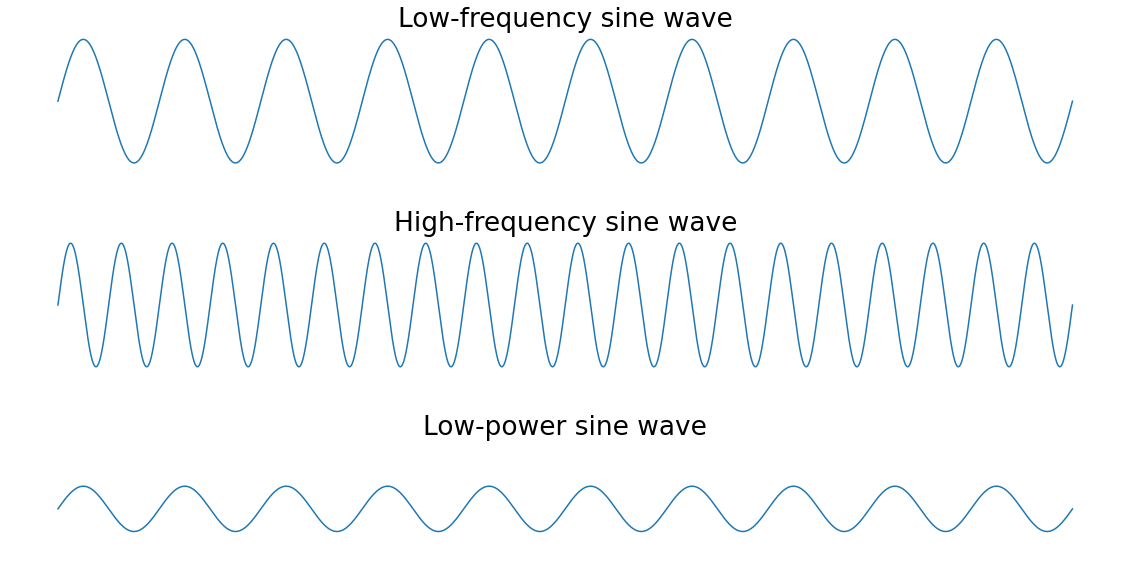

In [33]:
# for num in nums:
filename = 'speaker1_part1.wav'.format(num)
x, sr = librosa.load(filename)
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]

print(spectral_rolloff)
#     plt.figure(figsize=(12, 4))
#     librosa.display.waveplot(x, sr=sr, alpha=0.4)
#     plt.plot(t, normalize(spectral_rolloff), color='r')

[  10.76660156   10.76660156   10.76660156 1981.0546875  3800.61035156
 3779.07714844 2131.78710938 1959.52148438 2648.58398438 2325.5859375
 1798.02246094 1722.65625    1636.5234375  1496.55761719 1001.29394531
   10.76660156  904.39453125 2497.8515625  2713.18359375 3122.31445312
 2982.34863281 2691.65039062 3671.41113281 3682.17773438 3423.77929688
 2939.28222656 2433.25195312 2390.18554688 2594.75097656 2540.91796875
 2573.21777344 2928.515625   3240.74707031 3369.94628906 3369.94628906
 3337.64648438 3111.54785156 2034.88769531 3251.51367188 3283.81347656
 3294.58007812 3316.11328125 3090.01464844 2842.3828125  2454.78515625
 2368.65234375 1776.48925781  807.49511719  689.0625      635.22949219
  387.59765625   10.76660156   10.76660156 1937.98828125 2734.71679688
 1507.32421875 1453.49121094 1808.7890625  1259.69238281 1367.35839844
 1701.12304688 2088.72070312 2594.75097656 3542.21191406 3660.64453125
 3682.17773438 3477.61230469 3456.07910156 3456.07910156 3262.28027344
 2627.0

In [40]:
filename = 'speaker1_part1.wav'.format(num)
x, sr = librosa.load(filename)
chromagram = librosa.feature.chroma_stft(x, sr=sr)

In [43]:
chromagram, len(chromagram), len(chromagram[0])

(array([[0.        , 0.34678528, 0.34792995, ..., 0.00382265, 0.01479963,
         0.40837464],
        [0.        , 0.36476114, 0.3056035 , ..., 0.00399802, 0.02561364,
         0.16877303],
        [0.        , 0.4859547 , 0.23722567, ..., 0.01774071, 0.01726188,
         0.06780722],
        ...,
        [0.        , 0.8621189 , 0.93246275, ..., 0.22240074, 0.48773515,
         0.64201033],
        [0.        , 0.6859681 , 1.        , ..., 0.11687635, 0.3348506 ,
         1.        ],
        [0.        , 0.423037  , 0.7000531 , ..., 0.01958687, 0.04880465,
         0.7820641 ]], dtype=float32),
 12,
 431)